In [1]:
%matplotlib inline

from pylab import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

def Squeez(eps,theta,Del,kapa,ra,kta,phia,La,thetapa,kapb,rb,ktb,phib,Lb,thetapb,nu):
    kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
    kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
    kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
    kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
    ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
    kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
    ta    = kta/kapa                           #\tau_a (time delay in mode a)
    tb    = ktb/kapa                           #\tau_b (time delay in mode b)
    N    = int(len(nu))                           #\tau_b (time delay in mode b)
    
    ### EXPRESSIONS ###
    Ema = np.exp(1j*(-nu*ta+phia))
    Emb = np.exp(1j*(-nu*tb+phib))
    Epa = np.exp(1j*(nu*ta+phia))
    Epb = np.exp(1j*(nu*tb+phib))
    dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
    dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
    dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
    dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
    Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
    Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)

    alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
    alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
    beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
    beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
    alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
    alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
    beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
    beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)

    Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
    Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
    Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
    Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
    Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
    Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
    Nba = abs(eps)*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+\
    np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
    Nab = abs(eps)*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+\
    np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))
    
    ### CORRELATIONS ###
    ncorrm = abs(eps)*(1/np.abs(Lab)**2*(2*np.real(Mba)+Nba))  #(normalized)
    ncorrp = abs(eps)*(1/np.abs(Lba)**2*(2*np.real(Mab)+Nab))   #(normalized)
    Sout   = np.zeros(N)
    Sout[0:int(N/2)]  = 10*np.log10(1.+ncorrm[0:int(N/2)])
    Sout[int(N/2):N]  = 10*np.log10(1.+ncorrp[int(N/2):N])
    return Sout

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


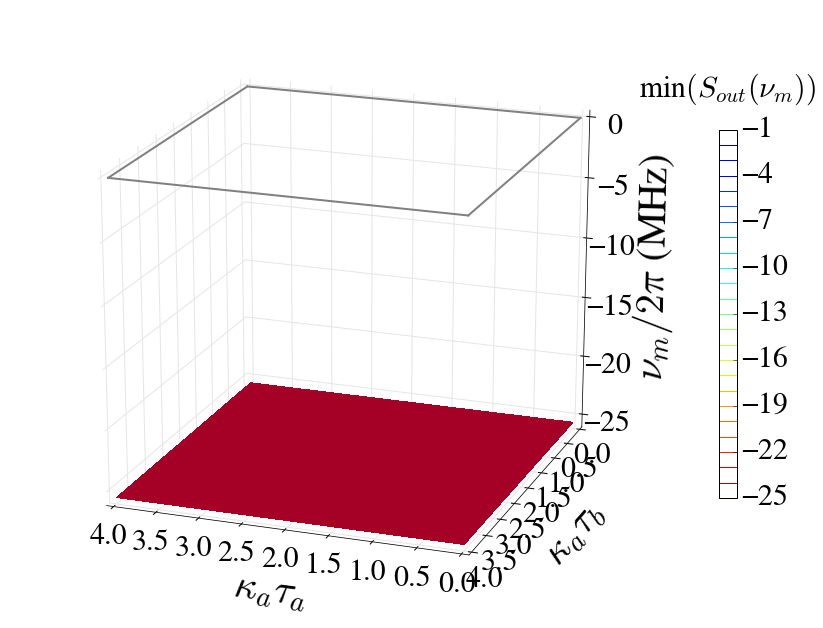

Elapsed time: 0:0:0:1


In [7]:
%matplotlib inline
#%matplotlib notebook

from pylab import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.interpolate import griddata
import mpl_toolkits.mplot3d as mp3d
import time

start=time.clock()

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['blue','orange','green','pink','brown']
fsfont = {'fontname':'FreeSerif'}

nu = np.linspace(0,60,10000)*2*np.pi
ta = np.linspace(0,4,10)
tb = np.linspace(0,4,10)
Smin = np.zeros((len(ta),len(tb)))
nus = np.zeros((len(ta),len(tb)))
tam,tbm = np.meshgrid(ta,tb)

for ia in range(0, len(ta)):
    for ib in range(0,len(tb)):
        Sout_fb = Squeez(0.45*2*np.pi*10,1*np.pi,0,10*2.*pi,0.933,ta[ia],np.pi,0,0,10*2.*pi,0.933,tb[ib],np.pi,0,0,nu)
        ind = np.argmin(Sout_fb)
        nus[ia,ib] = nu[ind]/2/np.pi
#        if np.min(Sout_fb)>=-40 and np.min(Sout_fb)<0:
        Smin[ia,ib]=np.min(Sout_fb)
#        else:
#            Smin[ia,ib]=-40

Lstartx = [0,4,4,0]
Lendx = [4,4,0,0]
Lstarty =[0,0,4,4]
Lendy=[0,4,4,0]

#Sminm = griddata((ta, tb), Smin, (ta[None,:], tb[:,None]), method='cubic')
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax = fig.add_subplot(1, 1, 1)
p = ax.plot_surface(tam, tbm, Smin, alpha=1.0,rstride=1, cstride=1, cmap=cm.RdYlGn, linewidth=0, antialiased=False)
#face2 = mp3d.art3d.Poly3DCollection([mid], alpha=0.3, linewidth=3)
#face2.set_facecolor((1, 1, 1, 0.3))
for i in range(4):
    ax.plot([Lstartx[i], Lendx[i]], [Lstarty[i],Lendy[i]],zs=[0,0],color="grey",lw=2)
#ax.add_collection3d(face2)
#ax.set_zlim(-10,15)
#ax.set_xlim(0,4)
#ax.set_ylim(0,4)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0))
levels = np.arange(-25.0, 0, 1.0)
#ax.invert_xaxis()
#ax.invert_yaxis()
#ax.set_xticks([4., 3., 2., 1., 0.])
#ax.set_yticks([4., 3., 2., 1., 0.])
#ax.set_zticks([0., 5., 10., 15.])
#ax.view_init(elev=20., azim=-75)
ax.tick_params(axis='z', which='major', pad=10)
ax.view_init(elev=20., azim=110)
cset = ax.contour(tam, tbm, Smin,levels=levels, zdir='z', offset=-10.75, cmap=cm.jet_r)
#cset = ax.contour(tam, tbm, Smin,levels=levels,  cmap=cm.RdYlGn)
cb = fig.colorbar(cset, shrink=0.6)
cb.ax.set_title('min$(S_{out}(\\nu_{m}))$\n', linespacing=1,**fsfont,fontsize=30)
ax.set_xlabel('\n$\kappa_a\\tau_a$',fontsize = 40,**fsfont,linespacing=1.5)
ax.set_ylabel('\n$\kappa_a\\tau_b$',fontsize = 40,**fsfont,linespacing=1.5)
#ax.zaxis.set_rotate_label(False)
ax.set_zlabel('\n$\\nu_{m}/2\pi$ (MHz)',fontsize = 40,**fsfont,linespacing=2, rotation=270)
#ax.xticks(fontsize = 35,**fsfont)
#ax.yticks(fontsize = 35,**fsfont)
plt.show()
end=time.clock()
durd=int((end-start)/60./60./24.)
durh=int((end-start)/60./60-24*durd)
durm=int((end-start)/60.-(24*durd+durh)*60.)
durs=int((end-start)-((24*durd+durh)*60+durm)*60)
print("Elapsed time: %d:%d:%d:%d" % (durd,durh,durm,durs))

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:66: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


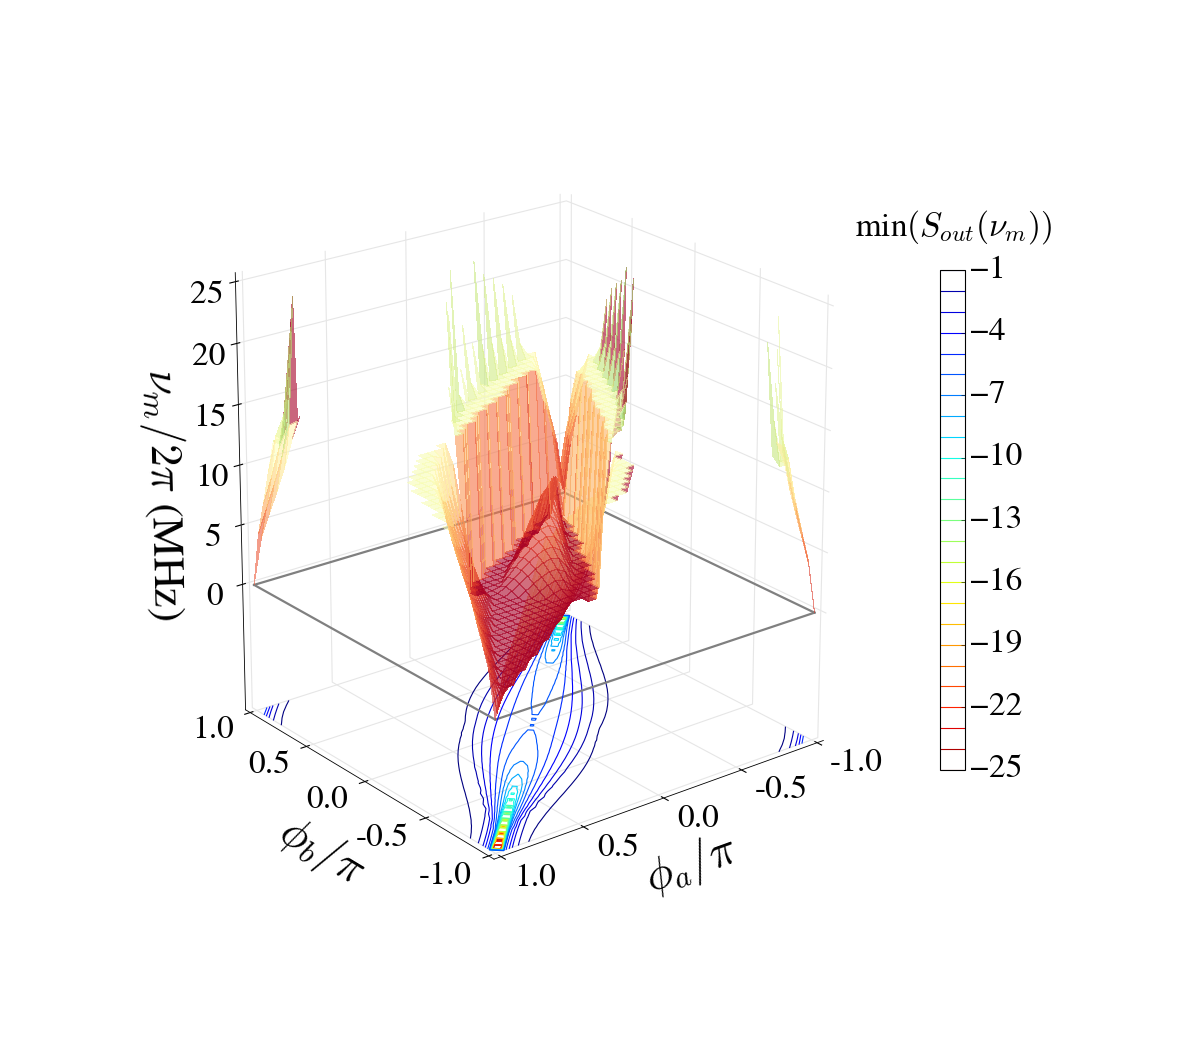

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


Elapsed time: 0:0:0:10


In [38]:
%matplotlib notebook
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.interpolate import griddata
import mpl_toolkits.mplot3d as mp3d
import time

start=time.clock()

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

def Squeez(eps,theta,Del,kapa,ra,kta,phia,La,thetapa,kapb,rb,ktb,phib,Lb,thetapb,nu):
    kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
    kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
    kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
    kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
    ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
    kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
    ta    = kta/kapa                           #\tau_a (time delay in mode a)
    tb    = ktb/kapa                           #\tau_b (time delay in mode b)
    N    = int(len(nu))                           #\tau_b (time delay in mode b)
    
    ### EXPRESSIONS ###
    Ema = np.exp(1j*(-nu*ta+phia))
    Emb = np.exp(1j*(-nu*tb+phib))
    Epa = np.exp(1j*(nu*ta+phia))
    Epb = np.exp(1j*(nu*tb+phib))
    dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
    dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
    dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
    dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
    Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
    Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)

    alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
    alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
    beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
    beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
    alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
    alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
    beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
    beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)

    Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
    Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
    Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
    Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
    Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
    Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
    Nba = abs(eps)*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+    np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
    Nab = abs(eps)*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+    np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))
    
    ### CORRELATIONS ###
    ncorrm = abs(eps)*(1/np.abs(Lab)**2*(2*np.real(Mba)+Nba))  #(normalized)
    ncorrp = abs(eps)*(1/np.abs(Lba)**2*(2*np.real(Mab)+Nab))   #(normalized)
    Sout   = np.zeros(N)
    Sout[0:int(N/2)]  = 10*np.log10(1.+ncorrm[0:int(N/2)])
    Sout[int(N/2):N]  = 10*np.log10(1.+ncorrp[int(N/2):N])
    return Sout

colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['blue','orange','green','pink','brown']
fsfont = {'fontname':'FreeSerif'}

ktaua=1.8832785157443013
ktaub=1.8832785157443013
nu = np.linspace(0,26,10000)*2*np.pi
pha = np.linspace(-1,1,41)*np.pi
phb = np.linspace(-1,1,41)*np.pi
Smin = np.zeros((len(pha),len(phb)))
nus = np.zeros((len(pha),len(phb)))
pham,phbm = np.meshgrid(pha/np.pi,phb/np.pi)

for ia in range(0, len(pha)):
    for ib in range(0,len(phb)):
        Sout_fb = Squeez(0.5*2*np.pi*10,1*np.pi,0,10*2.*pi,0.933012701892219,0,pha[ia],0,0,10*2.*pi,0.933012701892219,0,phb[ib],0,0,nu)
        ind = np.argmin(Sout_fb)
        if nu[ind]/2/np.pi<=25 and nu[ind]/2/np.pi>=0:
	        nus[ib,ia] = nu[ind]/2/np.pi
        else:
	        nus[ib,ia] = float('NaN')

#        if np.min(Sout_fb)>=-40 and np.min(Sout_fb)<0:
        Smin[ia,ib]=np.min(Sout_fb)
#        else:
#            Smin[ia,ib]=-40

Lstartx = [-1,1,1,-1]
Lendx = [1,1,-1,-1]
Lstarty =[-1,-1,1,1]
Lendy=[-1,1,1,-1]

#Sminm = griddata((ta, tb), Smin, (ta[None,:], tb[:,None]), method='cubic')
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax = fig.add_subplot(1, 1, 1)
norm = matplotlib.colors.Normalize(0, 25)
#face2 = mp3d.art3d.Poly3DCollection([mid], alpha=0.3, linewidth=3)
#face2.set_facecolor((1, 1, 1, 0.3))
#ax.add_collection3d(face2)
ax.set_zlim(-10,25)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='z', which='major', pad=10)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0))

labels=[-1., -0.5, 0., 0.5, 1.]
ax.set_yticklabels(labels,rotation=0,
                   verticalalignment='baseline',
                   horizontalalignment='right')
ax.set_zticks([0., 5., 10., 15.,20.,25.])
ax.set_xticklabels(labels,rotation=0,
                   verticalalignment='baseline',
                   horizontalalignment='left')
levels = np.arange(-25.0, 0, 1.0)
ax.invert_xaxis()
#ax.invert_yaxis()
ax.view_init(elev=20., azim=-128)
#ax.view_init(elev=30., azim=-110)
cset = ax.contour(pham, phbm, Smin,levels=levels, zdir='z', offset=-10.75, cmap=cm.jet_r)
#cset = ax.contour(tam, tbm, Smin,levels=levels,  cmap=cm.RdYlGn)
cb = fig.colorbar(cset, shrink=0.6)
cb.ax.set_title('min$(S_{out}(\\nu_{m}))$\n', linespacing=1,**fsfont,fontsize=30)
for i in range(4):
    ax.plot([Lstartx[i], Lendx[i]], [Lstarty[i],Lendy[i]],zs=[0,0],color="grey",lw=2)
p = ax.plot_surface(pham, phbm, nus, alpha=0.6,rstride=1, norm=norm, cstride=1, cmap=cm.RdYlGn, linewidth=0, antialiased=False)
ax.set_xlabel('\n$\phi_a/\pi$',fontsize = 40,**fsfont,linespacing=1.5)
ax.set_ylabel('\n$\phi_b/\pi$',fontsize = 40,**fsfont,linespacing=2)
#ax.zaxis.set_rotate_label(False)
ax.set_zlabel('\n$\\nu_{m}/2\pi$ (MHz)',fontsize = 40,**fsfont,linespacing=2., rotation=270)
plt.savefig("./Pyrag_eps=05,phia-phib-nus-Smin,ktau=0_3.png")
end=time.clock()
durd=int((end-start)/60./60./24.)
durh=int((end-start)/60./60-24*durd)
durm=int((end-start)/60.-(24*durd+durh)*60.)
durs=int((end-start)-((24*durd+durh)*60+durm)*60)
print("Elapsed time: %d:%d:%d:%d" % (durd,durh,durm,durs))


In [3]:
import sympy as sym
x = sym.symbols('x')
sym.solve(2*sym.sqrt((1-x)*x)-.5,x)

[0.0669872981077807, 0.933012701892219]

In [7]:
a=float('NaN')
a+5

nan

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in multiply
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in exp
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in multiply
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in exp
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__

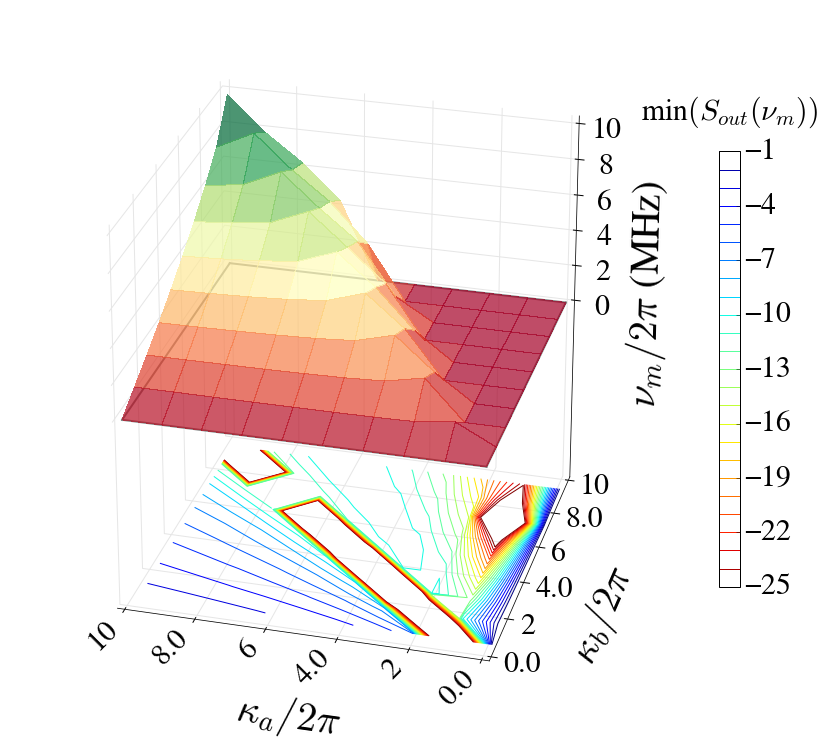

Elapsed time: 0:0:0:1


In [18]:
%matplotlib inline
#%matplotlib notebook

from pylab import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.interpolate import griddata
import mpl_toolkits.mplot3d as mp3d
import time

start=time.clock()

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['blue','orange','green','pink','brown']
fsfont = {'fontname':'FreeSerif'}

ktaua=1.8832785157443013
ktaub=1.8832785157443013
nu = np.linspace(0,60,10000)*2*np.pi
kapa = np.linspace(0,10,10)*np.pi*2
kapb = np.linspace(0,10,10)*np.pi*2
Smin = np.zeros((len(kapa),len(kapb)))
nus = np.zeros((len(kapa),len(kapb)))
kapam,kapbm = np.meshgrid(kapa/2/np.pi,kapb/2/np.pi)

for ia in range(0, len(kapa)):
    for ib in range(0,len(kapb)):
        Sout_fb = Squeez(0.75*kapa[ia],1*np.pi,0,kapa[ia],0.5,ktaua,0,0,0,kapb[ib],0.5,ktaub,0,0,0,nu)
        ind = np.argmin(Sout_fb)
        nus[ia,ib] = nu[ind]/2/np.pi
#        if np.min(Sout_fb)>=-40 and np.min(Sout_fb)<0:
        Smin[ia,ib]=np.min(Sout_fb)
#        else:
#            Smin[ia,ib]=-40

Lstartx = [0,10,10,0]
Lendx = [10,10,0,0]
Lstarty =[0,0,10,10]
Lendy=[0,10,10,0]

#Sminm = griddata((ta, tb), Smin, (ta[None,:], tb[:,None]), method='cubic')
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax = fig.add_subplot(1, 1, 1)
p = ax.plot_surface(kapam, kapbm, nus, alpha=0.7,rstride=1, cstride=1, cmap=cm.RdYlGn, linewidth=0, antialiased=False)
#face2 = mp3d.art3d.Poly3DCollection([mid], alpha=0.3, linewidth=3)
#face2.set_facecolor((1, 1, 1, 0.3))
for i in range(4):
    ax.plot([Lstartx[i], Lendx[i]], [Lstarty[i],Lendy[i]],zs=[0,0],color="grey",lw=2)
#ax.add_collection3d(face2)
ax.set_zlim(-10,10)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.tick_params(axis='x', which='major', pad=-5)
#ax.tick_params(axis='y', which='major', pad=0)
ax.tick_params(axis='z', which='major', pad=15)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0))

labels=[0., 2, 4., 6, 8.,10]
ax.set_yticklabels(labels,rotation=0,
                   verticalalignment='baseline',
                   horizontalalignment='left')
ax.set_zticks([0., 2.,4.,6.,8.,10])
ax.set_xticklabels(labels,rotation=45,
                   #verticalalignment='baseline',
                   horizontalalignment='right')
levels = np.arange(-25.0, 0, 1.0)
ax.invert_xaxis()
#ax.invert_yaxis()
ax.view_init(elev=25., azim=-75)
#ax.view_init(elev=30., azim=-110)
cset = ax.contour(kapam, kapbm, Smin,levels=levels, zdir='z', offset=-10.75, cmap=cm.jet_r)
#cset = ax.contour(tam, tbm, Smin,levels=levels,  cmap=cm.RdYlGn)
cb = fig.colorbar(cset, shrink=0.6)
cb.ax.set_title('min$(S_{out}(\\nu_{m}))$\n', linespacing=1,**fsfont,fontsize=30)
ax.set_xlabel('\n$\kappa_a/2\pi$',fontsize = 40,**fsfont,linespacing=2.5)
ax.set_ylabel('\n$\kappa_b/2\pi$',fontsize = 40,**fsfont,linespacing=3)
#ax.zaxis.set_rotate_label(False)
ax.set_zlabel('\n$\\nu_{m}/2\pi$ (MHz)',fontsize = 40,**fsfont,linespacing=2.5, rotation=270)
#ax.xticks(fontsize = 35,**fsfont)
#ax.yticks(fontsize = 35,**fsfont)
plt.show()
end=time.clock()
durd=int((end-start)/60./60./24.)
durh=int((end-start)/60./60-24*durd)
durm=int((end-start)/60.-(24*durd+durh)*60.)
durs=int((end-start)-((24*durd+durh)*60+durm)*60)
print("Elapsed time: %d:%d:%d:%d" % (durd,durh,durm,durs))

<IPython.core.display.Javascript object>


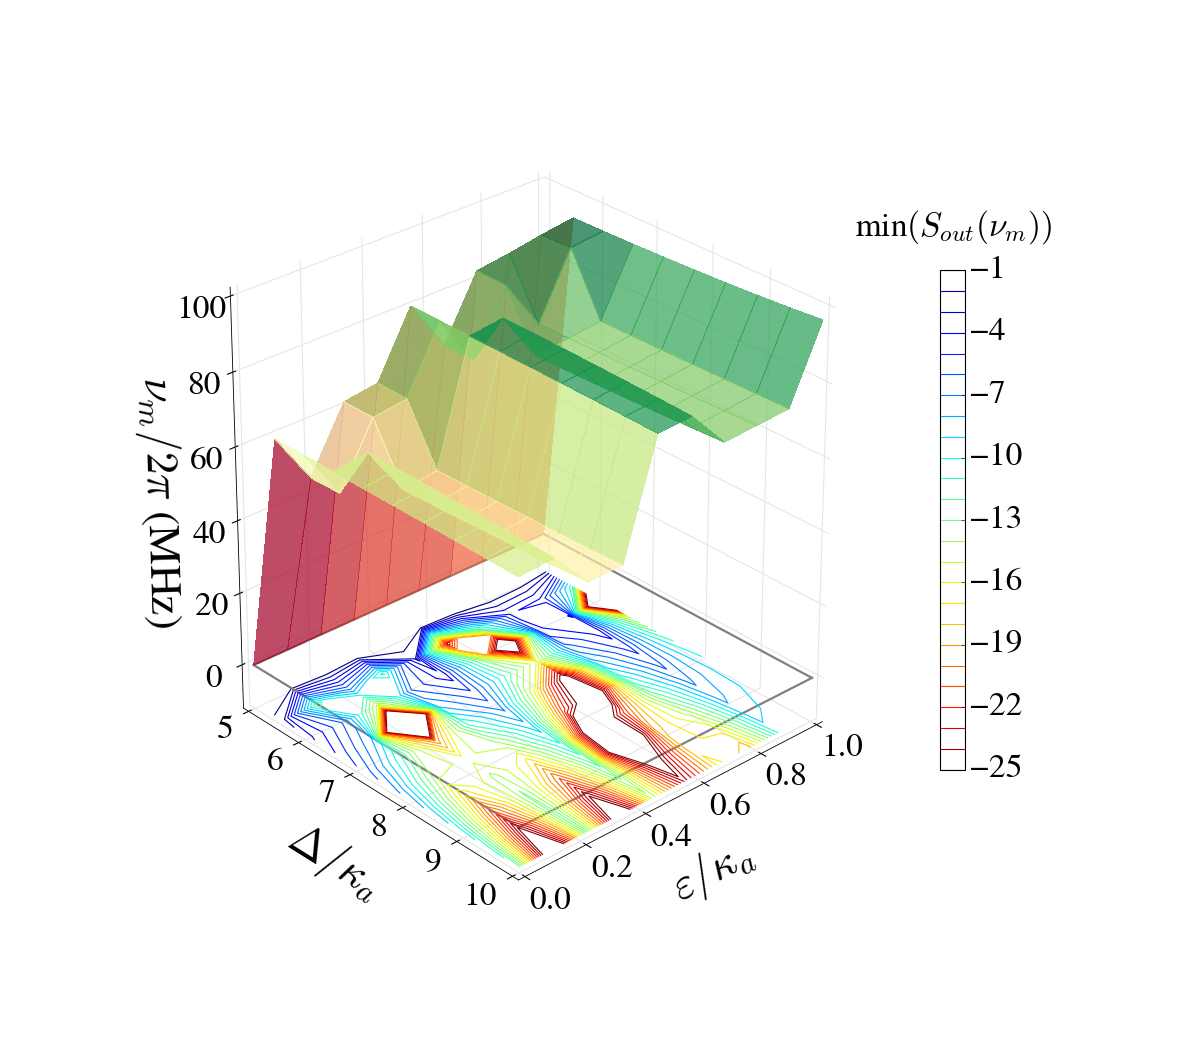

Elapsed time: 0:0:0:0


In [16]:
#%matplotlib inline
%matplotlib notebook

from pylab import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.interpolate import griddata
import mpl_toolkits.mplot3d as mp3d
import time

start=time.clock()

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['blue','orange','green','pink','brown']
fsfont = {'fontname':'FreeSerif'}

ktaua=3.08647680594
ktaub=3.08647680594
nu = np.linspace(0,100,10000)*2*np.pi
eps = np.linspace(0,1,10)
Del = np.linspace(5,10,10)
Smin = np.zeros((len(eps),len(Del)))
nus = np.zeros((len(eps),len(Del)))
epsm,Delm = np.meshgrid(eps,Del)

for ia in range(0, len(eps)):
    for ib in range(0,len(Del)):
        Sout_fb = Squeez(eps[ia]*10*2*np.pi,1*np.pi,Del[ib]*10*2*np.pi,10*2*np.pi,0.5,ktaua,0,0,0,10*2*np.pi,0.5,\
                         ktaub,0,0,0,nu)
        ind = np.argmin(Sout_fb)
        nus[ia,ib] = nu[ind]/2/np.pi
#        if np.min(Sout_fb)>=-40 and np.min(Sout_fb)<0:
        Smin[ia,ib]=np.min(Sout_fb)
#        else:
#            Smin[ia,ib]=-40

Lstartx = [0,1,1,0]
Lendx = [1,1,0,0]
Lstarty =[5,5,10,10]
Lendy=[5,10,10,5]

#Sminm = griddata((ta, tb), Smin, (ta[None,:], tb[:,None]), method='cubic')
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax = fig.add_subplot(1, 1, 1)
p = ax.plot_surface(epsm, Delm, nus, alpha=0.7,rstride=1, cstride=1, cmap=cm.RdYlGn, linewidth=0, antialiased=False)
#face2 = mp3d.art3d.Poly3DCollection([mid], alpha=0.3, linewidth=3)
#face2.set_facecolor((1, 1, 1, 0.3))
for i in range(4):
    ax.plot([Lstartx[i], Lendx[i]], [Lstarty[i],Lendy[i]],zs=[0,0],color="grey",lw=2)
#ax.add_collection3d(face2)
ax.set_zlim(-10,100)
ax.set_xlim(0,1)
ax.set_ylim(5,10)
ax.tick_params(axis='x', which='major', pad=-2)
ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='z', which='major', pad=10)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0))

labeleps=[0., 0.2, 0.4, 0.6,0.8,1.0]
labelDel=[5, 6, 7, 8, 9,10]
ax.set_yticklabels(labelDel,rotation=0,
                   verticalalignment='baseline',
                   horizontalalignment='right')
#ax.set_zticks([0., 2.,4.,6.,8.,10])
ax.set_xticklabels(labeleps,rotation=0,
                   #verticalalignment='baseline',
                   horizontalalignment='left')
levels = np.arange(-25.0, 0, 1.0)
ax.invert_xaxis()
#ax.invert_yaxis()
ax.view_init(elev=25., azim=47)
#ax.view_init(elev=30., azim=-110)
cset = ax.contour(epsm, Delm, Smin,levels=levels, zdir='z', offset=-10.75, cmap=cm.jet_r)
#cset = ax.contour(tam, tbm, Smin,levels=levels,  cmap=cm.RdYlGn)
cb = fig.colorbar(cset, shrink=0.6)
cb.ax.set_title('min$(S_{out}(\\nu_{m}))$\n', linespacing=1,**fsfont,fontsize=30)
ax.set_xlabel('\n$\\varepsilon/\kappa_a$',fontsize = 40,**fsfont,linespacing=2.)
ax.set_ylabel('\n$\Delta/\kappa_a$',fontsize = 40,**fsfont,linespacing=2.)
#ax.zaxis.set_rotate_label(False)
ax.set_zlabel('\n$\\nu_{m}/2\pi$ (MHz)',fontsize = 40,**fsfont,linespacing=2, rotation=270)
#ax.xticks(fontsize = 35,**fsfont)
#ax.yticks(fontsize = 35,**fsfont)
plt.show()
end=time.clock()
durd=int((end-start)/60./60./24.)
durh=int((end-start)/60./60-24*durd)
durm=int((end-start)/60.-(24*durd+durh)*60.)
durs=int((end-start)-((24*durd+durh)*60+durm)*60)
print("Elapsed time: %d:%d:%d:%d" % (durd,durh,durm,durs))

<IPython.core.display.Javascript object>


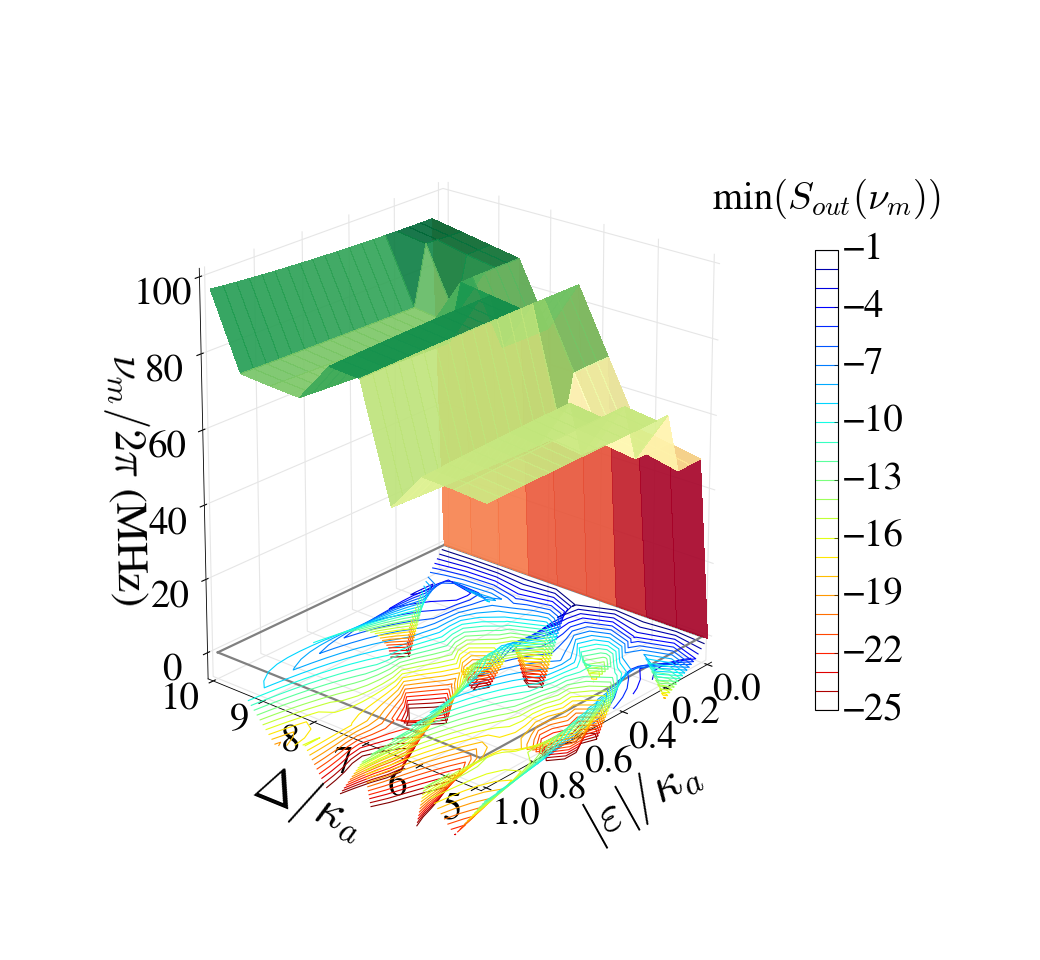

Elapsed time: 0:0:0:12


In [20]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.interpolate import griddata
import mpl_toolkits.mplot3d as mp3d
import time

start=time.clock()

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=35)
mpl.rc('ytick',labelsize=35)

def Squeez(eps,theta,Del,kapa,ra,kta,phia,La,thetapa,kapb,rb,ktb,phib,Lb,thetapb,nu):
	kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
	kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
	kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
	kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
	ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
	kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
	ta    = kta/kapa                           #\tau_a (time delay in mode a)
	tb    = ktb/kapb                           #\tau_b (time delay in mode b)
	N    = int(len(nu))                           #\tau_b (time delay in mode b)

	### EXPRESSIONS ###
	Ema = np.exp(1j*(-nu*ta+phia))
	Emb = np.exp(1j*(-nu*tb+phib))
	Epa = np.exp(1j*(nu*ta+phia))
	Epb = np.exp(1j*(nu*tb+phib))
	dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
	dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
	dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
	dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
	Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
	Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)

	alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
	alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
	beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
	beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
	alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
	alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
	beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
	beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)

	Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
	Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
	Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
	Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
	Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
	Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
	Nba = abs(eps)*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+\
	np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
	Nab = abs(eps)*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+\
	np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))
	### CORRELATIONS ###
	ncorrm = abs(eps)*(1/np.abs(Lab)**2*(2*np.real(Mba)+Nba))  #(normalized)
	ncorrp = abs(eps)*(1/np.abs(Lba)**2*(2*np.real(Mab)+Nab))   #(normalized)
#	Soutm  = 10*np.log10(1.+ncorrm)
#	Soutp  = 10*np.log10(1.+ncorrp)
	Sout   = np.zeros(N)
	Sout[0:int(N/2)]  = 10*np.log10(1.+ncorrm[0:int(N/2)])
	Sout[int(N/2):N]  = 10*np.log10(1.+ncorrp[int(N/2):N])
	return Sout#,Soutm,Soutp

colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['blue','orange','green','pink','brown']
fsfont = {'fontname':'FreeSerif'}

ktaua=3.08647680594
ktaub=3.08647680594
nu = np.linspace(0,100,100000)*2*np.pi
eps = np.linspace(0,1,20)
Del = np.linspace(4.9,10,10)
Smin = np.zeros((len(Del),len(eps)))
nus = np.zeros((len(Del),len(eps)))
epsm,Delm = np.meshgrid(eps,Del)
kapa=10*2*np.pi

for ia in range(0, len(eps)):
    for ib in range(0,len(Del)):
#def Squeez(eps,theta,Del,kapa,ra,kta,phia,La,thetapa,kapb,rb,ktb,phib,Lb,thetapb,nu):
        Sout_fb = Squeez(eps[ia]*kapa,1*np.pi,Del[ib]*kapa,kapa,0.5,ktaua,0,0,0,kapa,0.5,ktaub,0,0,0,nu)
        ind = np.argmin(Sout_fb)
        nus[ib,ia] = nu[ind]/2/np.pi
#        if np.min(Sout_fb)>=-40 and np.min(Sout_fb)<0:
        Smin[ib,ia]=np.min(Sout_fb)
#        else:
#            Smin[ia,ib]=-40

Lstartx = [0,1,1,0]
Lendx = [1,1,0,0]
Lstarty =[5,5,10,10]
Lendy=[5,10,10,5]

#Sminm = griddata((ta, tb), Smin, (ta[None,:], tb[:,None]), method='cubic')
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax = fig.add_subplot(1, 1, 1)
ax.set_zlim(-5,100)
ax.set_xlim(0,1)
ax.set_ylim(5,10)
ax.tick_params(axis='x', which='major', pad=-2)
ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='z', which='major', pad=15)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0))

labeleps=[0., 0.2, 0.4, 0.6,0.8,1.0]
labelDel=[5, 6, 7, 8, 9,10]
ax.set_yticklabels(labelDel,rotation=0,
                   verticalalignment='baseline',
                   horizontalalignment='right')
#ax.set_zticks([0., 2.,4.,6.,8.,10])
ax.set_xticklabels(labeleps,rotation=0,
                   #verticalalignment='baseline',
                   horizontalalignment='left')
levels = np.arange(-25.0, 0, 1.0)
ax.invert_xaxis()
#ax.invert_yaxis()
ax.view_init(elev=25., azim=-120)
#ax.view_init(elev=30., azim=-110)
#cset = ax.contour(epsm, Delm, Smin,levels=levels,zdir='z', offset=-6, cmap=cm.jet_r)
cset = ax.contour(epsm, Delm, Smin,levels=levels,cmap=cm.jet_r)
#cset = ax.contour(tam, tbm, Smin,levels=levels,  cmap=cm.RdYlGn)
for i in range(4):
    ax.plot([Lstartx[i], Lendx[i]], [Lstarty[i],Lendy[i]],zs=[0,0],color="grey",lw=2)
p = ax.plot_surface(epsm, Delm, nus, alpha=0.9,rstride=1, cstride=1, cmap=cm.RdYlGn, linewidth=0, antialiased=False)
cb = fig.colorbar(cset, shrink=0.6)
cb.ax.set_title('min$(S_{out}(\\nu_{m}))$\n', linespacing=1,**fsfont,fontsize=35)
ax.set_xlabel('\n$|\\varepsilon|/\kappa_a$',fontsize = 45,linespacing=2,**fsfont)
ax.set_ylabel('\n$\Delta/\kappa_a$',fontsize = 45,linespacing=1.5,**fsfont)
#ax.zaxis.set_rotate_label(False)
ax.set_zlabel('\n$\\nu_{m}/2\pi$ (MHz)',fontsize = 40,**fsfont,linespacing=2, rotation=270)
plt.savefig("./eps-Del-nus-Smin,ktau=30865_2_3d_big.png")
end=time.clock()
durd=int((end-start)/60./60./24.)
durh=int((end-start)/60./60-24*durd)
durm=int((end-start)/60.-(24*durd+durh)*60.)
durs=int((end-start)-((24*durd+durh)*60+durm)*60)
print("Elapsed time: %d:%d:%d:%d" % (durd,durh,durm,durs))


<IPython.core.display.Javascript object>


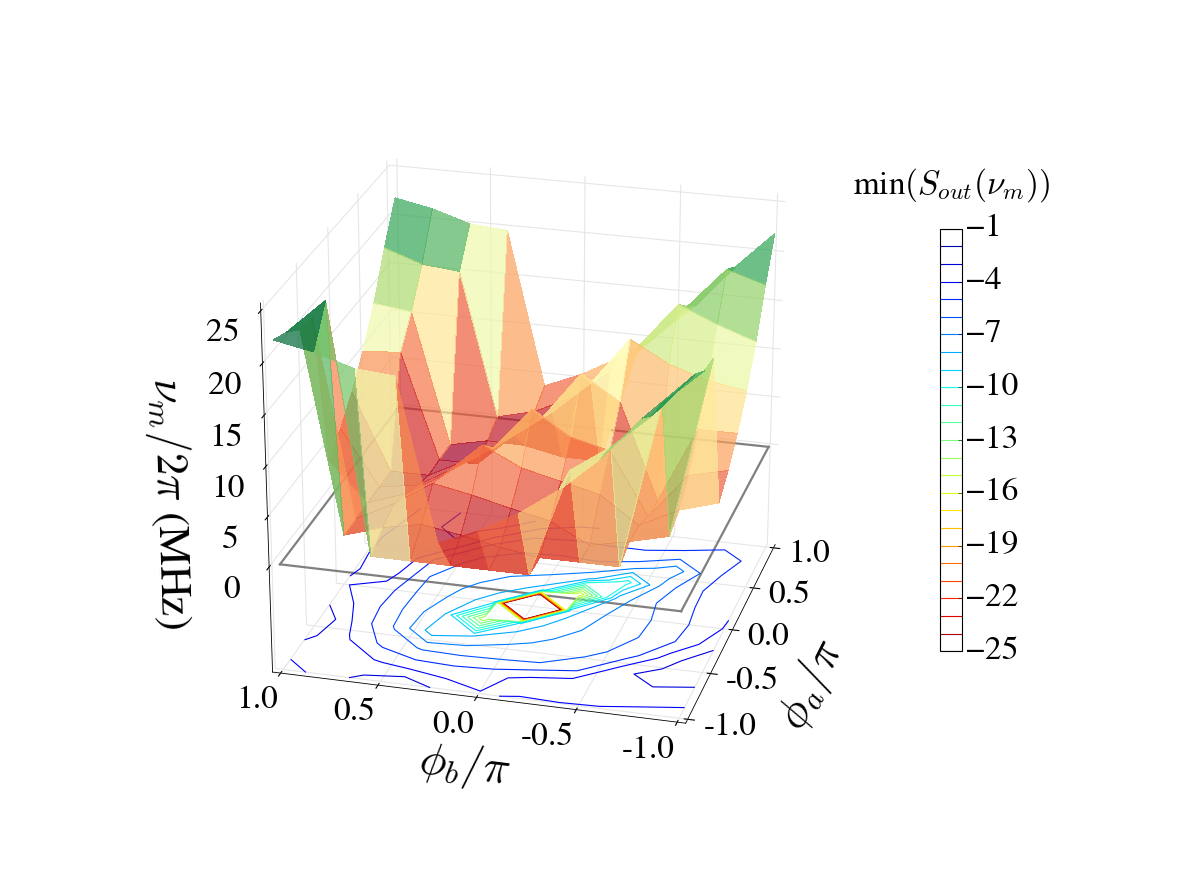

Elapsed time: 0:0:0:2


In [32]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from pylab import *
from scipy.optimize import fsolve
#plt.ioff() #http://matplotlib.org/faq/usage_faq.html (interactive mode)
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.interpolate import griddata
import mpl_toolkits.mplot3d as mp3d
import time

start=time.clock()

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

def Squeez(eps,theta,Del,kapa,ra,kta,phia,La,thetapa,kapb,rb,ktb,phib,Lb,thetapb,nu):
    kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
    kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
    kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
    kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
    ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
    kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
    ta    = kta/kapa                           #\tau_a (time delay in mode a)
    tb    = ktb/kapa                           #\tau_b (time delay in mode b)
    N    = int(len(nu))                           #\tau_b (time delay in mode b)
    
    ### EXPRESSIONS ###
    Ema = np.exp(1j*(-nu*ta+phia))
    Emb = np.exp(1j*(-nu*tb+phib))
    Epa = np.exp(1j*(nu*ta+phia))
    Epb = np.exp(1j*(nu*tb+phib))
    dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
    dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
    dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
    dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
    Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
    Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)

    alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
    alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
    beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
    beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
    alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
    alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
    beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
    beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)

    Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
    Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
    Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
    Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
    Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
    Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
    Nba = abs(eps)*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+    np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
    Nab = abs(eps)*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+    np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))
    
    ### CORRELATIONS ###
    ncorrm = abs(eps)*(1/np.abs(Lab)**2*(2*np.real(Mba)+Nba))  #(normalized)
    ncorrp = abs(eps)*(1/np.abs(Lba)**2*(2*np.real(Mab)+Nab))   #(normalized)
    Sout   = np.zeros(N)
    Sout[0:int(N/2)]  = 10*np.log10(1.+ncorrm[0:int(N/2)])
    Sout[int(N/2):N]  = 10*np.log10(1.+ncorrp[int(N/2):N])
    return Sout

colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['blue','orange','green','pink','brown']
fsfont = {'fontname':'FreeSerif'}

ktaua=1.8832785157443013
ktaub=1.8832785157443013
nu = np.linspace(0,60,30001)*2*np.pi
pha = np.linspace(-1,1,11)*np.pi
phb = np.linspace(-1,1,11)*np.pi
Smin = np.zeros((len(pha),len(phb)))
nus = np.zeros((len(pha),len(phb)))
pham,phbm = np.meshgrid(pha/np.pi,phb/np.pi)

for ia in range(0, len(pha)):
    for ib in range(0,len(phb)):
        Sout_fb = Squeez(0.75*2*np.pi*10,1*np.pi,0,10*2.*np.pi,0.5,ktaua,pha[ia],0,0,10*2.*np.pi,0.5,ktaub,phb[ib],0,0,nu)
        ind = np.argmin(Sout_fb)
        nus[ib,ia] = nu[ind]/2/np.pi
#        if np.min(Sout_fb)>=-40 and np.min(Sout_fb)<0:
        Smin[ib,ia]=np.min(Sout_fb)
#        else:
#            Smin[ia,ib]=-40

Lstartx = [-1,1,1,-1]
Lendx = [1,1,-1,-1]
Lstarty =[-1,-1,1,1]
Lendy=[-1,1,1,-1]

#Sminm = griddata((ta, tb), Smin, (ta[None,:], tb[:,None]), method='cubic')
fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax = fig.add_subplot(1, 1, 1)
p = ax.plot_surface(pham, phbm, nus, alpha=0.7,rstride=1, cstride=1, cmap=cm.RdYlGn, linewidth=0, antialiased=False)
#face2 = mp3d.art3d.Poly3DCollection([mid], alpha=0.3, linewidth=3)
#face2.set_facecolor((1, 1, 1, 0.3))
#ax.add_collection3d(face2)
ax.set_zlim(-10,25)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.tick_params(axis='x', which='major', pad=5)
ax.tick_params(axis='y', which='major', pad=0)
ax.tick_params(axis='z', which='major', pad=15)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0))

labels=[-1., -0.5, 0., 0.5, 1.]
ax.set_yticklabels(labels,rotation=0,
                   verticalalignment='top',
                   horizontalalignment='right')
ax.set_zticks([0., 5., 10., 15.,20.,25.])
ax.set_xticklabels(labels,rotation=0,
                   verticalalignment='baseline',
                   horizontalalignment='left')
levels = np.arange(-25.0, 0, 1.0)
#ax.invert_xaxis()
#ax.invert_yaxis()
#ax.view_init(elev=25., azim=-75)
ax.view_init(elev=25., azim=-165)
cset = ax.contour(pham, phbm, Smin,levels=levels, zdir='z', offset=-10.75, cmap=cm.jet_r)
#cset = ax.contour(tam, tbm, Smin,levels=levels,  cmap=cm.RdYlGn)
for i in range(4):
    ax.plot([Lstartx[i], Lendx[i]], [Lstarty[i],Lendy[i]],zs=[0,0],color="grey",lw=2)
cb = fig.colorbar(cset, shrink=0.6)
cb.ax.set_title('min$(S_{out}(\\nu_{m}))$\n', linespacing=1,**fsfont,fontsize=30)
ax.set_xlabel('\n$\phi_a/\pi$',fontsize = 40,**fsfont,linespacing=3)
ax.set_ylabel('\n$\phi_b/\pi$',fontsize = 40,**fsfont,linespacing=1.5)
#ax.zaxis.set_rotate_label(False)
ax.set_zlabel('\n$\\nu_{m}/2\pi$ (MHz)',fontsize = 40,**fsfont,linespacing=3, rotation=270)
#ax.xticks(fontsize = 35,**fsfont)
#ax.yticks(fontsize = 35,**fsfont)
plt.savefig("./eps=075,phia-phib-nus-Smin,ktau=18833_3.png")
end=time.clock()
durd=int((end-start)/60./60./24.)
durh=int((end-start)/60./60-24*durd)
durm=int((end-start)/60.-(24*durd+durh)*60.)
durs=int((end-start)-((24*durd+durh)*60+durm)*60)
print("Elapsed time: %d:%d:%d:%d" % (durd,durh,durm,durs))


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:66: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


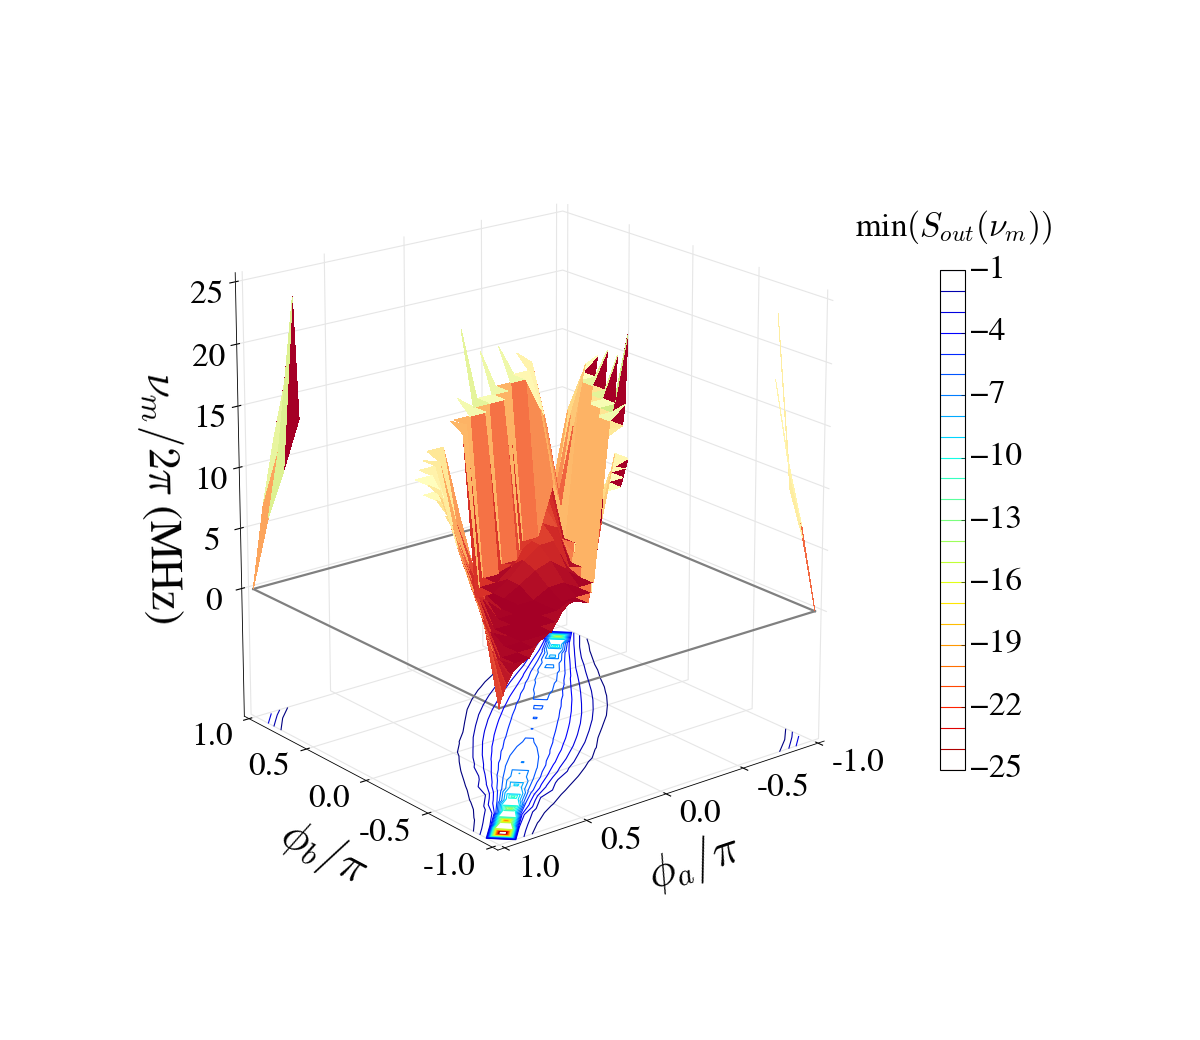

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


Elapsed time: 0:0:0:3


In [8]:
%matplotlib notebook
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.interpolate import griddata
import mpl_toolkits.mplot3d as mp3d
import time

start=time.clock()

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

def Squeez(eps,theta,Del,kapa,ra,kta,phia,La,thetapa,kapb,rb,ktb,phib,Lb,thetapb,nu):
    kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
    kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
    kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
    kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
    ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
    kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
    ta    = kta/kapa                           #\tau_a (time delay in mode a)
    tb    = ktb/kapa                           #\tau_b (time delay in mode b)
    N    = int(len(nu))                           #\tau_b (time delay in mode b)
    
    ### EXPRESSIONS ###
    Ema = np.exp(1j*(-nu*ta+phia))
    Emb = np.exp(1j*(-nu*tb+phib))
    Epa = np.exp(1j*(nu*ta+phia))
    Epb = np.exp(1j*(nu*tb+phib))
    dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
    dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
    dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
    dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
    Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
    Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)

    alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
    alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
    beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
    beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
    alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
    alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
    beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
    beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)

    Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
    Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
    Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
    Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
    Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
    Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
    Nba = abs(eps)*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+    np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
    Nab = abs(eps)*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+    np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))
    
    ### CORRELATIONS ###
    ncorrm = abs(eps)*(1/np.abs(Lab)**2*(2*np.real(Mba)+Nba))  #(normalized)
    ncorrp = abs(eps)*(1/np.abs(Lba)**2*(2*np.real(Mab)+Nab))   #(normalized)
    Sout   = np.zeros(N)
    Sout[0:int(N/2)]  = 10*np.log10(1.+ncorrm[0:int(N/2)])
    Sout[int(N/2):N]  = 10*np.log10(1.+ncorrp[int(N/2):N])
    return Sout

colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['blue','orange','green','pink','brown']
fsfont = {'fontname':'FreeSerif'}

ktaua=1.8832785157443013
ktaub=1.8832785157443013
nu = np.linspace(0,26,10000)*2*np.pi
pha = np.linspace(-1,1,21)*np.pi
phb = np.linspace(-1,1,21)*np.pi
Smin = np.zeros((len(pha),len(phb)))
nus = np.zeros((len(pha),len(phb)))
pham,phbm = np.meshgrid(pha/np.pi,phb/np.pi)

for ia in range(0, len(pha)):
    for ib in range(0,len(phb)):
        Sout_fb = Squeez(0.5*2*np.pi*10,1*np.pi,0,10*2.*pi,0.933012701892219,0,pha[ia],0,0,10*2.*pi,0.933012701892219,0,phb[ib],0,0,nu)
        ind = np.argmin(Sout_fb)
        if nu[ind]/2/np.pi<=25 and nu[ind]/2/np.pi>=0:
	        nus[ib,ia] = nu[ind]/2/np.pi
        else:
	        nus[ib,ia] = float('NaN')

#        if np.min(Sout_fb)>=-40 and np.min(Sout_fb)<0:
        Smin[ia,ib]=np.min(Sout_fb)
#        else:
#            Smin[ia,ib]=-40

Lstartx = [-1,1,1,-1]
Lendx = [1,1,-1,-1]
Lstarty =[-1,-1,1,1]
Lendy=[-1,1,1,-1]

#Sminm = griddata((ta, tb), Smin, (ta[None,:], tb[:,None]), method='cubic')
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax = fig.add_subplot(1, 1, 1)
norm = matplotlib.colors.Normalize(0, 25)
#face2 = mp3d.art3d.Poly3DCollection([mid], alpha=0.3, linewidth=3)
#face2.set_facecolor((1, 1, 1, 0.3))
#ax.add_collection3d(face2)
ax.set_zlim(-10,25)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='z', which='major', pad=10)
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0))

labels=[-1., -0.5, 0., 0.5, 1.]
ax.set_yticklabels(labels,rotation=0,
                   verticalalignment='baseline',
                   horizontalalignment='right')
ax.set_zticks([0., 5., 10., 15.,20.,25.])
ax.set_xticklabels(labels,rotation=0,
                   verticalalignment='baseline',
                   horizontalalignment='left')
levels = np.arange(-25.0, 0, 1.0)
ax.invert_xaxis()
#ax.invert_yaxis()
ax.view_init(elev=20., azim=-128)
#ax.view_init(elev=30., azim=-110)
cset = ax.contour(pham, phbm, Smin,levels=levels, zdir='z', offset=-10.75, cmap=cm.jet_r)
#cset = ax.contour(tam, tbm, Smin,levels=levels,  cmap=cm.RdYlGn)
cb = fig.colorbar(cset, shrink=0.6)
cb.ax.set_title('min$(S_{out}(\\nu_{m}))$\n', linespacing=1,**fsfont,fontsize=30)
for i in range(4):
    ax.plot([Lstartx[i], Lendx[i]], [Lstarty[i],Lendy[i]],zs=[0,0],color="grey",lw=2)
p = ax.plot_surface(pham, phbm, nus, alpha=1,rstride=1, norm=norm, cstride=1, cmap=cm.RdYlGn, linewidth=0, antialiased=False)
ax.set_xlabel('\n$\phi_a/\pi$',fontsize = 40,**fsfont,linespacing=1.5)
ax.set_ylabel('\n$\phi_b/\pi$',fontsize = 40,**fsfont,linespacing=2)
#ax.zaxis.set_rotate_label(False)
ax.set_zlabel('\n$\\nu_{m}/2\pi$ (MHz)',fontsize = 40,**fsfont,linespacing=2., rotation=270)
plt.savefig("./Pyrag_eps=05,phia-phib-nus-Smin,ktau=0_3.png")
end=time.clock()
durd=int((end-start)/60./60./24.)
durh=int((end-start)/60./60-24*durd)
durm=int((end-start)/60.-(24*durd+durh)*60.)
durs=int((end-start)-((24*durd+durh)*60+durm)*60)
print("Elapsed time: %d:%d:%d:%d" % (durd,durh,durm,durs))
